In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Đọc vào dataset

In [2]:
df = pd.read_csv('SmallDS.csv')


<h1 style="color:white;background-color:rgb(234, 93, 77);padding:10px; border-radius:10px; text-align:center"> Các thống kê cơ bản </h1>

In [3]:
df.head()

,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
0,31638135,Combo 4 quần lót nam Boxer sợi cạp 1cm sợ...,MRM Manlywear,340000,85000,255000,25,4281,4.7,1167,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943
1,172210350,"Hộp 4 quần boxer nam thun lạnh, quần lót nam c...",ARADO FASHION,199000,41000,158000,21,625,4.8,158,17914,FORMEN SHOP,1599,4.5441,False,4558,2041
2,79435123,"Áo chống nắng nam cao cấp, thông hơi, chống nắ...",OEM,215000,86000,129000,40,1010,4.7,263,17914,FORMEN SHOP,1599,4.5441,False,4558,2041
3,31637590,Combo 4 quần lót nam tam giác Bamboo Organi...,MRM Manlywear,340000,91000,249000,27,2765,4.7,761,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943
4,99958075,Quần đùi short gió nam thể thao Basic trẻ...,MRM Manlywear,199000,70000,129000,35,2202,4.7,452,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   name                   1000 non-null   object 
 2   brand                  1000 non-null   object 
 3   original_price         1000 non-null   int64  
 4   discount               1000 non-null   int64  
 5   current_price          1000 non-null   int64  
 6   discount_rate          1000 non-null   int64  
 7   quantity_sold          1000 non-null   int64  
 8   rating_average         1000 non-null   float64
 9   product_review_count   1000 non-null   int64  
 10  seller_id              1000 non-null   int64  
 11  seller_name            1000 non-null   object 
 12  days_since_joined      1000 non-null   int64  
 13  seller_rating_average  1000 non-null   float64
 14  is_official            1000 non-null   bool   
 15  selle

Dùng original_price, price, discount, rating_average, quantity_sold -> predict price

In [5]:
df['brand'].value_counts()

brand
OEM              437
KHATOCO           62
GOKING            29
5S                26
MRM Manlywear     25
                ... 
Fezzio             1
Gumac              1
MAYHOMES           1
BAMI HOME          1
Redikick           1
Name: count, Length: 114, dtype: int64

### Kiểm tra có dữ liệu trống hay không ?

In [6]:
df.isnull().sum()

id                       0
name                     0
brand                    0
original_price           0
discount                 0
current_price            0
discount_rate            0
quantity_sold            0
rating_average           0
product_review_count     0
seller_id                0
seller_name              0
days_since_joined        0
seller_rating_average    0
is_official              0
seller_review_count      0
total_follower           0
dtype: int64

<p style="color:purple; font-weight:bold"> => API khi respond về có các mẫu bị trống dữ liệu nhưng đã được lược bỏ đi, không đưa vào dataset </p>

<h1 style="color:white;background-color:rgb(234, 93, 77);padding:10px; border-radius:10px; text-align:center"> Khám phá dữ liệu có gì ? </h1>

## So sánh giá ban đầu và giá đã giảm

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2872\4042076913.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.original_price, color='gray', shade=True, label='Original')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2872\4042076913.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.current_price, color='blue', shade=True, label='Current')


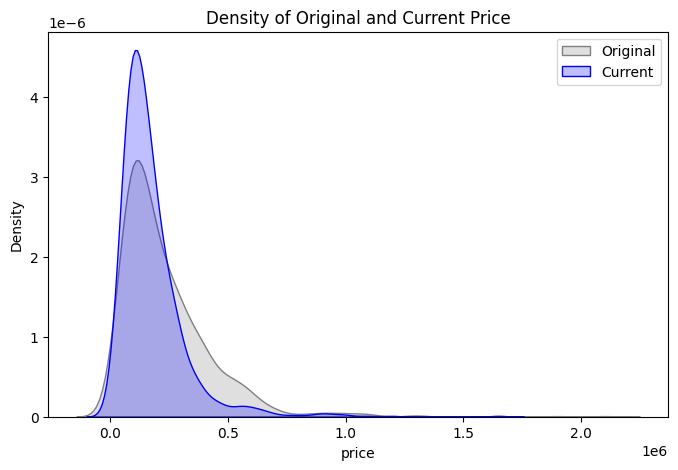

In [7]:
fig = plt.subplots(figsize=(8, 5))

ax = sns.kdeplot(df.original_price, color='gray', shade=True, label='Original')
ax = sns.kdeplot(df.current_price, color='blue', shade=True, label='Current')

plt.xlabel('price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

<p style="color:violet; font-weight:bold"> - Phần lớn giá đồ dùng thời trang thường dưới mức 1.000.000 VNĐ, các sản phẩm loanh quanh dưới 500.00 VNĐ rất nhiều (phần lớn là khoảng vài trăm) </p>

## Liên hệ gì giữa giá sản phẩm và lượt bán ra ?

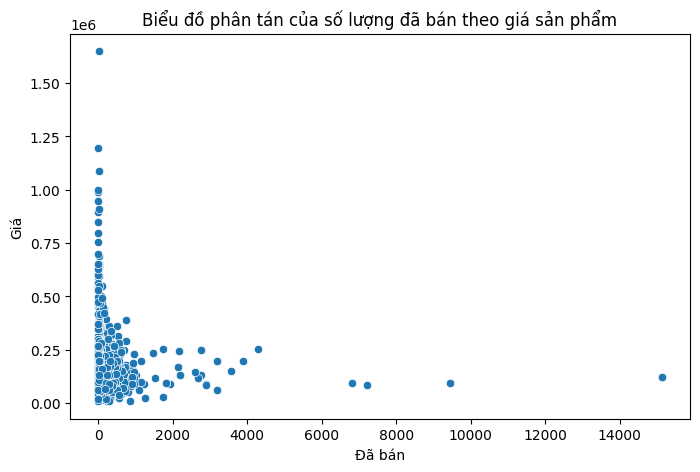

In [8]:
fig = plt.subplots(figsize=(8, 5))

ax=sns.scatterplot(df, x='quantity_sold', y='current_price')

# Đặt tên cho trục x và trục y
plt.xlabel('Đã bán')
plt.ylabel('Giá')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ phân tán của số lượng đã bán theo giá sản phẩm')

# Hiển thị biểu đồ
plt.show()

<p style="color:blue; font-weight:bold"> Có mối liên hệ khá trực quan: </p>
<p style="color:red; font-weight:normal"> - có rất nhiều sản phẩm trong tầm giá dưới 500.000 </p>
<p style="color:red; font-weight:normal"> - Các sản phẩm giá rẻ dưới 500.000 (vài chục đến vài trăm) có số lượng bán ra lớn </p> 
<p style="color:red; font-weight:normal"> - Các sản phẩm có giá cao (> 500.000) có lượt bán rất ít, hầu như không có </p>
<p style="color:red; font-weight:bold"> => Mặt hàng thời trang tập trung vào phân khúc giá rẻ và tầm trung nên có người mua nhiều </p>

## Đánh giá càng tốt, càng bán chạy ?

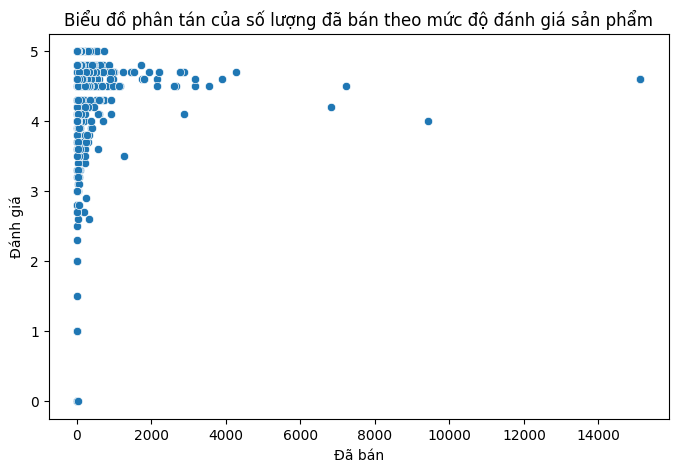

In [9]:
fig = plt.subplots(figsize=(8, 5))

ax=sns.scatterplot(data=df, x='quantity_sold', y='rating_average')

plt.xlabel('Đã bán')
plt.ylabel('Đánh giá')
plt.title('Biểu đồ phân tán của số lượng đã bán theo mức độ đánh giá sản phẩm')
plt.show()

<p style="color:red; font-weight:normal"> * Mặc dù có nhiều sản phẩm có mức độ đánh giá rất cao nhưng bán được cũng rất ít </p>
<p style="color:red; font-weight:normal"> * Các sản phẩm bán chạy có mức độ đánh giá khoảng từ 4.0 đến 5.0 </p> 
<p style="color:red; font-weight:bold">     => Lượt bán chạy còn phụ thuộc vào đánh giá của sản phẩm nhận được và độ uy tín của người bán </p>

## Vậy những sản phẩm bán chạy nhất có gì?

### Top 10 sản phẩm lượt bán cao nhất

In [10]:
grouped_product = df.groupby('name')

# Tính tổng số lượng sản phẩm đã bán, và giá trị trung bình của đánh giá và giảm giá
sales_data = pd.DataFrame({
    'Quantity sold': grouped_product['quantity_sold'].sum(),
    'Product rating' : grouped_product['rating_average'].mean(),
    'Seller rating': grouped_product['seller_rating_average'].mean(),
    'Price' : grouped_product['current_price'].mean(),
    "Brand" : grouped_product['brand'].sum(),
})
sales_data.index = sales_data.index.str[:20]

sales_data = sales_data.sort_values(by=['Quantity sold'], ascending=False).head(10)
sales_data

,Quantity sold,Product rating,Seller rating,Price,Brand
name,,,,,
COmbo 5 quần ĐÙI May,30247,4.6,4.5740,120000.0,May 10May 10
Quần Âu Nam KOJIBA C,9437,4.0,3.9109,95000.0,KOJIBA
Combo 4 Quần Lót Đùi,7215,4.5,4.3544,85000.0,OEM
Bộ 5 Quần Sịp Tam Gi,6812,4.2,4.3544,95000.0,OEM
Quần đùi short gio,4404,4.7,4.7070,129000.0,MRM ManlywearMRM Manlywear
Combo 4 quần lót n,4281,4.7,4.7070,255000.0,MRM Manlywear
Combo 3 quần lót n,3897,4.6,4.7070,199000.0,MRM Manlywear
Combo 4 Quần Lót Nam,3634,4.6,4.5213,92000.0,CITYMENCITYMEN
Combo 10 Quần Lót Na,3558,4.5,4.5213,149000.0,CITYMEN


* Hầu như là các sản phẩm có giá giao động trên dưới 200.000

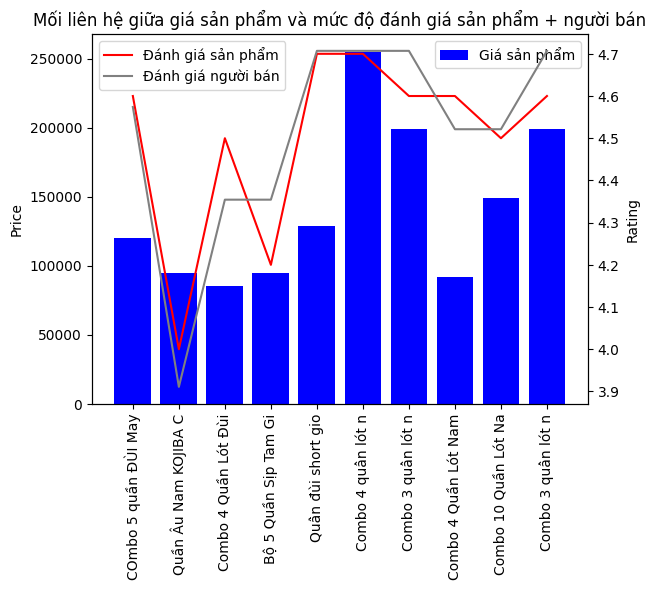

In [11]:
fig, ax1 = plt.subplots()
ax1.bar(range(len(sales_data)), sales_data['Price'], align='center', color='blue')
ax1.set_ylabel('Price')
ax1.set_xticks(range(len(sales_data)))
ax1.set_xticklabels(sales_data.index, rotation=90)

# Tạo biểu đồ dạng đường cho đánh giá trung bình
ax2 = ax1.twinx()
ax2.plot(range(len(sales_data)), sales_data['Product rating'], color='red')
ax2.set_ylabel('Product rating')

ax2.plot(range(len(sales_data)), sales_data['Seller rating'], color='gray')
ax2.set_ylabel('Rating')

# Đặt tiêu đề cho biểu đồ
plt.title('Mối liên hệ giữa giá sản phẩm và mức độ đánh giá sản phẩm + người bán')

ax1.legend(['Giá sản phẩm'], loc='best')
ax2.legend(['Đánh giá sản phẩm', 'Đánh giá người bán'], loc='best')
# Hiển thị biểu đồ
plt.show()

## Nhãn hàng nào có lượt bán cao nhất ?

### Top 10 nhãn hàng lượt bán cao nhất

In [12]:
quantity_sold_value = df.groupby('brand').sum()['quantity_sold'].sort_values(ascending=False).head(10)
quantity_sold_value

brand
OEM              43032
May 10           31997
MRM Manlywear    29198
CITYMEN          18788
KOJIBA           13241
N6                7944
Tsimple           7293
5S                5505
KHATOCO           5260
ARADO FASHION     4780
Name: quantity_sold, dtype: int64

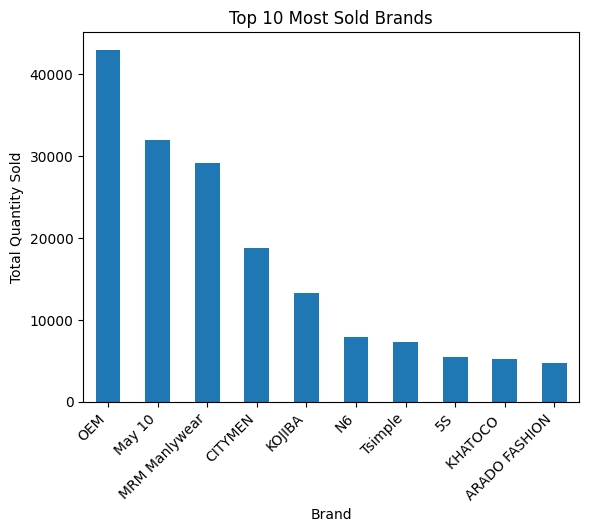

In [13]:
ax = quantity_sold_value.plot.bar()
ax.set_xticklabels(quantity_sold_value.index, rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Most Sold Brands')

# Hiển thị biểu đồ
plt.show()

In [14]:
grouped_brand = df.groupby('brand')

# Tính tổng số lượng sản phẩm đã bán, và giá trị trung bình của đánh giá và giảm giá
sales_data = pd.DataFrame({
    'Total Quantity Sold': grouped_brand['quantity_sold'].sum(),
    'Seller count' : grouped_brand['seller_name'].nunique(),
    'Average Seller Rating': grouped_brand['seller_rating_average'].mean(),
    'Average Discount Rating': grouped_brand['discount_rate'].mean(),
    'Mean original price' : grouped_brand['original_price'].mean(),
    'Mean current price' : grouped_brand['current_price'].mean(),
})

sales_data.sort_values(by=['Total Quantity Sold'], ascending=False).head(10)


,Total Quantity Sold,Seller count,Average Seller Rating,Average Discount Rating,Mean original price,Mean current price
brand,,,,,,
OEM,43032,206,4.178455,5.787185,153966.926773,142548.274600
May 10,31997,1,4.574000,7.900000,187200.000000,172200.000000
MRM Manlywear,29198,1,4.707000,29.840000,335440.000000,226440.000000
CITYMEN,18788,2,4.514080,38.050000,143100.000000,87100.000000
KOJIBA,13241,1,3.910900,0.000000,89666.666667,89666.666667
N6,7944,1,4.195800,34.600000,178533.333333,115400.000000
Tsimple,7293,1,4.651400,39.421053,189052.631579,112684.210526
5S,5505,1,4.657000,42.153846,407230.769231,222807.692308
KHATOCO,5260,1,4.740700,52.435484,463467.741935,214937.096774


<p style="color:grey; font-weight:bold"> - Mức giảm giá trung bình của mỗi nhãn hàng không phải là yếu tố quyết định số lượng sản phẩm đã bán được </p>
<p style="color:grey; font-weight:bold"> - Các nhãn hàng bán chạy nhất có rating trung bình tương đối tốt (hầu hết là trên 4.0 hoặc dê xịch xuống 1 chút) </p>
<p style="color:red; font-weight:bold"> -> Nhãn hàng OEM khá đặc biệt khi có đến 206 seller (gấp rất nhiều lần các nhãn hàng khác) bán mặt hàng này và số lượng bán ra cũng là lớn nhất </p>

In [15]:
def sort_product_by_col(col):
    res = df.groupby('id')[col].max().sort_values(ascending=False).index.tolist()
    return res

In [16]:
rating_average_lst = sort_product_by_col("rating_average")
product_review_count_lst = sort_product_by_col("product_review_count")
quantity_sold_lst = sort_product_by_col("quantity_sold")
print(rating_average_lst)

[251773296, 200927239, 86127619, 198320889, 198364769, 198518796, 198584661, 198650949, 198934502, 199679659, 151801252, 201119038, 198211399, 201292581, 201359185, 201853386, 174178053, 80973417, 201866940, 79396134, 152334968, 202020706, 176250783, 176301618, 67493148, 91861046, 147444853, 196370019, 147672967, 196856850, 93968595, 147937982, 92393846, 91935441, 196898067, 197170229, 87550402, 148337861, 197633193, 198099838, 198100134, 198112625, 89687135, 89631305, 198123072, 87967105, 77916015, 202038040, 77868132, 205968893, 73218325, 156000684, 204053479, 204914749, 205187503, 172919020, 172327845, 205297516, 205299392, 205993470, 77715371, 160417810, 160845877, 207269736, 160883985, 172282030, 67516826, 67516630, 67516618, 67516385, 204043794, 203952537, 155494342, 74493672, 77600983, 202383625, 202518134, 76596135, 153677777, 203115271, 76166657, 203197390, 154298071, 203490964, 75769500, 75767748, 154917738, 203821053, 203914610, 154921520, 203930800, 203951603, 74595348, 147

In [17]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) | set(list2) | set(list3))
        
ids = top_k_common_elements(rating_average_lst, product_review_count_lst, quantity_sold_lst, 50)

result = pd.DataFrame()
for id in ids:
    result = pd.concat([result, df.loc[df['id'] == id]], ignore_index=True)
result

,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
0,86127619,ÁO THUN BODY VẢI COTTON DÀY DẶN Y ẢNH (attron),OEM,116000,58000,58000,50,3,5.0,1,175928,xuongchuyensi9x,777,3.9713,False,348,75
1,174178053,"Áo Polo Nam Cổ Bẻ Guzado Chất Liệu Mát Mẻ, Pho...",GUZADO,175000,0,175000,0,6,5.0,3,141397,GUZADO,1012,4.4147,True,475,244
2,200927239,Áo PoLo form rộng phong cách Hàn Quốc thêu chữ...,OEM,79000,0,79000,0,2,5.0,1,309390,LyLa Shop,214,4.7500,False,4,3
3,103076103,"áo ba lỗ nam, áo 3 lỗ nam sợi cotton Orga...",JAMANO,99000,20000,79000,20,871,4.8,98,147336,JM STORE,976,4.6942,False,3898,910
4,110704393,Combo 2 quần đùi nam Cotton mặc nhà thoải...,JAMANO,140000,41000,99000,29,1161,4.5,234,147336,JM STORE,976,4.6942,False,3898,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,76537581,Quần Jean Nam Đen Trơn cao cấp thương hiệu Cha...,Chandi,280000,112000,168000,40,2140,4.5,706,18150,CHANDI OFFICIAL STORE,1593,4.5967,True,10013,1663
109,22760941,Combo 3 Áo thun nam cổ bẻ [ Tặng 1 quần lót xị...,dokafashion,406000,127500,278500,31,370,4.5,204,13906,Doka Fashion,1637,4.4620,True,1686,352
110,20261362,Bộ 5 Quần Lót Nam Nhật Thông Hơi Cao Cấp (Giao...,OEM,88000,0,88000,0,967,4.5,90,10911,5Star,1680,4.3544,False,4216,469
111,198320889,Áo polo nam A-CHILL TOUCH Anta 852237122,ANTA,1079000,323700,755300,30,2,5.0,2,6194,ANTA VIETNAM,1774,4.7441,True,4017,10447


## Top người bán uy tín

> Giao của seller_avg_rating, review_count (of seller), total_follower + Show ra table của các sản phẩm này (top 100)

In [18]:
print('Sản phẩm bán chạy nhất: ')
max_price = df['quantity_sold'].idxmax()
print(max_price)
max_row = df.loc[[max_price]]
max_row

Sản phẩm bán chạy nhất: 
28


,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
28,67538621,COmbo 5 quần ĐÙI May 10,May 10,135000,15000,120000,11,15128,4.6,4681,16588,May 10,1607,4.574,False,7998,2295


In [19]:
print('Sản phẩm bán được ít nhất: ')
max_price = df['quantity_sold'].idxmin()
max_row = df.loc[[max_price], ['brand', 'original_price', 'price', 'discount', 'discount_rate', 'quantity_sold', 'rating_average', 'review_count', 'is_official']]
max_row

Sản phẩm bán được ít nhất: 


KeyError: "['price', 'review_count'] not in index"

<Axes: xlabel='rating_average', ylabel='count'>

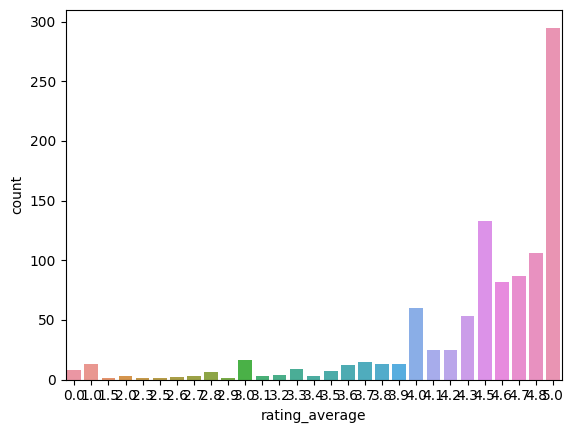

In [ ]:
sns.countplot(x = df['rating_average'])